In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

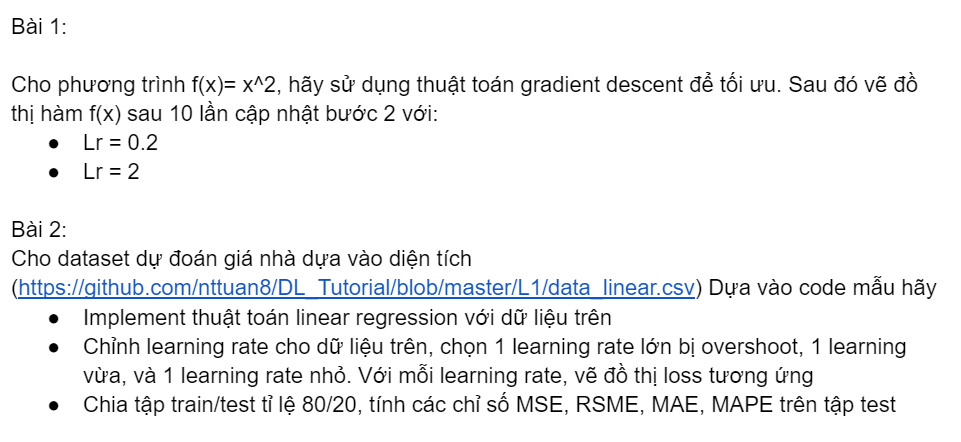

## EX1

In [53]:
def f(x):
    return x**2


def derivative(x):
    return x * 2

# gradient descent algorithm
def gradient_descent(x_initial, n_iter, learning_rate):

    x_hist = []
    fx_hist = []
    # generate an initial x
    x = x_initial 
    
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(x)
        
        #update x_new
        x_new = x - learning_rate * gradient
        new_fx = f(x_new)
        x = x_new
        
        # store solution
        x_hist.append(x_new)
        fx_hist.append(new_fx)
       
        #print('>%d f(%s) = %.5f' % (i, x_hist, fx_hist))
    return x, x_hist, fx_hist


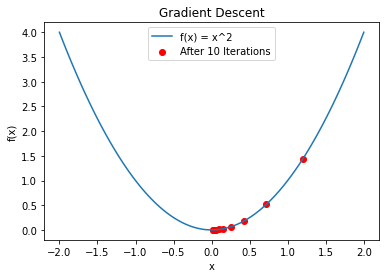

In [54]:
x_initial = 2
n_iter = 10
learning_rate = 0.2
x, x_hist, fx_hist = gradient_descent(x_initial, n_iter, learning_rate)

x_values = np.linspace(-2, 2, 100)
y_values = f(x_values)
plt.plot(x_values, y_values, label='f(x) = x^2')
plt.scatter(x_hist, fx_hist, color='red', label=f'After {n_iter} Iterations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'Gradient Descent')
plt.show() 

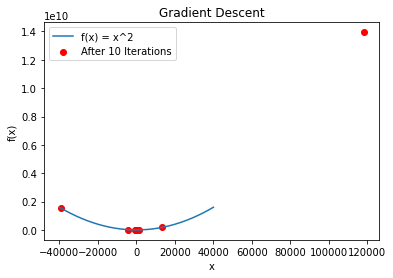

In [55]:
x_initial = 2
n_iter = 10
learning_rate = 2
x, x_hist, fx_hist = gradient_descent(x_initial, n_iter, learning_rate)

x_values = np.linspace(-40000, 40000, 1000)
y_values = f(x_values)
plt.plot(x_values, y_values, label='f(x) = x^2')
plt.scatter(x_hist, fx_hist, color='red', label=f'After {n_iter} Iterations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'Gradient Descent')
plt.show() 

### EX2 

In [57]:
data = pd.read_csv('https://github.com/nttuan8/DL_Tutorial/raw/master/L1/data_linear.csv')
data.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [94]:
def gradient_descent(w, x, y, lr = 1e-5, n_iter = 100):
    loss_lst = []
    y_hat = x @ w
    for iter in range(n_iter):
        #print("w", w,  w.size())
        g = ((y_hat - y).T @ x / x.size(0)).reshape(-1, 1)
        #print("g", g,  g.size())
        w = w - lr * g
        y_hat = x @ w

        loss =  torch.sum((y - y_hat) ** 2) / (2 * x.size(0))
        #print(loss)
        loss_lst.append(loss)

    torch.Tensor.ndim = property(lambda self: len(self.shape))  #ndim: Access the number of dimensions
    plt.plot(loss_lst)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("At learning rate = {}".format(lr))

    return w

def linear_regression(random_w, x, y, lr = 1e-5):
    result = gradient_descent(random_w, x, y, lr)
    w = result
    #print("w", w,  w.size())
    y_hat = x @ w
    #print("y_hat", y_hat,  y_hat.size())
    #print("x", x.size())
    return y_hat


In [109]:
random_w = torch.randn(2, 1)
x = torch.tensor(data["Diện tích"].astype(np.float32))
y = torch.tensor(data["Giá"].astype(np.float32))
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)

x = torch.cat([ones, x.reshape(-1, 1)], dim = 1) # dim:specifies the axis or direction along which the concatenation occurs.
y = y.reshape(-1, 1)
print(x)
print(y)

tensor([[  1.0000,  30.0000],
        [  1.0000,  32.4138],
        [  1.0000,  34.8276],
        [  1.0000,  37.2414],
        [  1.0000,  39.6552],
        [  1.0000,  42.0690],
        [  1.0000,  44.4828],
        [  1.0000,  46.8966],
        [  1.0000,  49.3103],
        [  1.0000,  51.7241],
        [  1.0000,  54.1379],
        [  1.0000,  56.5517],
        [  1.0000,  58.9655],
        [  1.0000,  61.3793],
        [  1.0000,  63.7931],
        [  1.0000,  66.2069],
        [  1.0000,  68.6207],
        [  1.0000,  71.0345],
        [  1.0000,  73.4483],
        [  1.0000,  75.8621],
        [  1.0000,  78.2759],
        [  1.0000,  80.6897],
        [  1.0000,  83.1034],
        [  1.0000,  85.5172],
        [  1.0000,  87.9310],
        [  1.0000,  90.3448],
        [  1.0000,  92.7586],
        [  1.0000,  95.1724],
        [  1.0000,  97.5862],
        [  1.0000, 100.0000]])
tensor([[ 448.5240],
        [ 509.2480],
        [ 535.1040],
        [ 551.4320],
        [ 623.4

### Change learning rate

#### Moderate LR

tensor([[ 449.2450],
        [ 485.4557],
        [ 521.6664],
        [ 557.8772],
        [ 594.0879],
        [ 630.2986],
        [ 666.5093],
        [ 702.7201],
        [ 738.9293],
        [ 775.1400],
        [ 811.3508],
        [ 847.5615],
        [ 883.7723],
        [ 919.9830],
        [ 956.1937],
        [ 992.4045],
        [1028.6151],
        [1064.8259],
        [1101.0366],
        [1137.2473],
        [1173.4581],
        [1209.6687],
        [1245.8781],
        [1282.0887],
        [1318.2996],
        [1354.5103],
        [1390.7209],
        [1426.9318],
        [1463.1423],
        [1499.3531]])

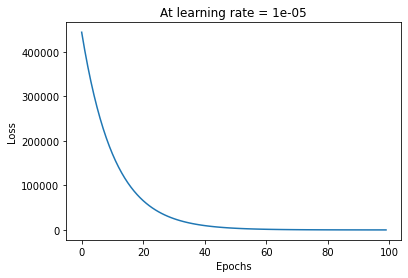

In [96]:
y_hat = linear_regression(random_w, x, y, 1e-5)
y_hat

#### Large LR

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]])

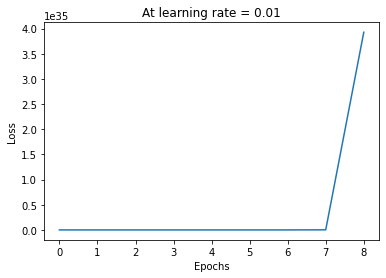

In [88]:
y_hat = linear_regression(random_w, x, y, 1e-2)
y_hat

#### Small LR

tensor([[ -4.7128],
        [ -4.9994],
        [ -5.2859],
        [ -5.5725],
        [ -5.8590],
        [ -6.1456],
        [ -6.4321],
        [ -6.7187],
        [ -7.0052],
        [ -7.2918],
        [ -7.5783],
        [ -7.8649],
        [ -8.1514],
        [ -8.4380],
        [ -8.7245],
        [ -9.0111],
        [ -9.2976],
        [ -9.5842],
        [ -9.8708],
        [-10.1573],
        [-10.4439],
        [-10.7304],
        [-11.0170],
        [-11.3035],
        [-11.5901],
        [-11.8766],
        [-12.1632],
        [-12.4497],
        [-12.7363],
        [-13.0228]])

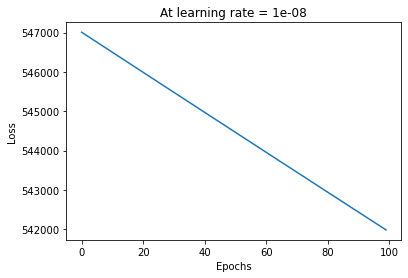

In [73]:
y_hat = linear_regression(random_w, x, y, 1e-8)
y_hat

### Calculate metric

In [126]:
df = data.copy()
# Select a random 80% of the rows
np.random.seed(30)
percentage = 0.8
train_sample = df.sample(frac=percentage)

In [127]:
remaining_indices = df.index.difference(train_sample.index)
# Select the remaining 20% of rows based on the calculated indices
test_sample = df.loc[remaining_indices]
test_sample

,Diện tích,Giá
5,42.0690,625.992
12,58.9655,866.707
13,61.3793,902.545
20,78.2759,1153.130
27,95.1724,1469.690
29,100.0000,1515.280


In [131]:
random_w = torch.randn(2, 1)

x = train_sample['Diện tích'].values.reshape(-1,1)
x = torch.tensor(x).float()
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)
x_train = torch.cat([ones, x], dim = 1)

y = train_sample['Giá'].values.reshape(-1,1)
y = torch.tensor(y).float()
y_train = y.reshape(-1, 1)

tensor([[ 0.6111],
        [14.9600]])

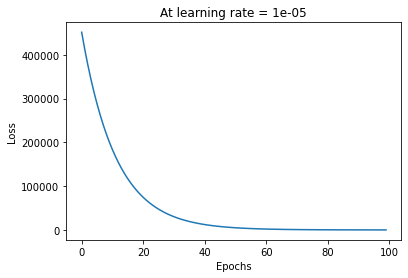

In [133]:
w = gradient_descent(random_w, x_train, y_train)
w

In [134]:
x = test_sample['Diện tích'].values.reshape(-1,1)
x = torch.tensor(x).float()
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)
x_test = torch.cat([ones, x], dim = 1)

y = test_sample['Giá'].values.reshape(-1,1)
y = torch.tensor(y).float()
y_test = y.reshape(-1, 1)
y_test_hat = x_test @ w

In [135]:
y_test_hat

tensor([[ 629.9612],
        [ 882.7321],
        [ 918.8423],
        [1171.6147],
        [1424.3855],
        [1496.6061]])

In [136]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_hat)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_hat)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_test_hat)

# Print the calculated metrics
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

MSE: 546.84
RMSE: 23.38
MAE: 19.79
MAPE: 0.02
